# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

the smartcab does not move

it recieves negative reward for good bad behaviour, positive for good.

when the light is red, and the smartcab does not move the reward is positive. This positive reward is greater than the negative reward -- likely because running a red light is dangerous, avoiding danger is the most desired trait. When the car does not move on a green light this does not endanger anyone, so the "punnishment" is less.

When the light is green the reward is dependent on whether the agent causes and accident or a traffic violation.
If the agent causes a violation or accident the reward is negative. 
If the agent chooses an action that does not cause and accident or violation that takes it into a state closer to the goal the agernt is rewarded, if there is no violation but the agent does get closer to the goal the agent is penalized. The agent is also penalized in the event that it does nothing on a green light as this is a traffic violation.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
Flags:

* Learning -- enables Q learning, the car starts taking actions.
* num_dummies -- number of other vehicles in the simulation not controlled by the agent
* enforce_deadlines --  apply time limit to simulation.

The update function is called. DummyAgent does not call the base class (Agent) update function, instead overiding it, with the DummyAgent update method picking a random action that does not violate any traffic laws. Similarly the LearningAgent overides the update method and does the following things:
* builds the state from the environment, adding it to the stored Q values if not present
* chooses an action
* gets a reward based on action chosen
* updates the Q values based on reward and action

Render initializes the GUI -- displaying a realtime visual output, via pygame. ```render_text``` prints the data to stdout.

planner.py checks East-West first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


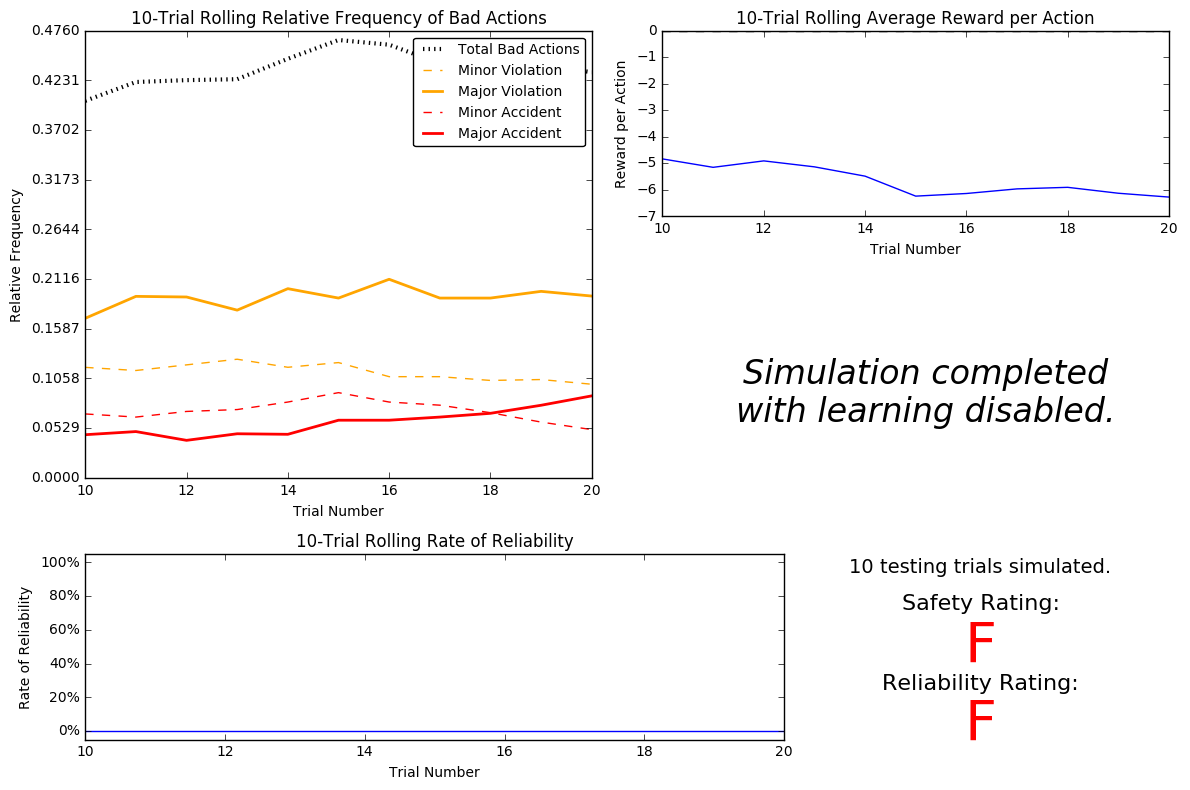

In [8]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**10 trial rolling relative frequency of bad actions:**
* total bad actions stays about the same as number of trials increases.
* major accidents increases steadily, however given random movement this is likely coincidental -- there is no learning occuring.

10 trial rolling average reward per action
* Average reward per action is negative initially, this indicates that the algorithm is being "punished" for poor performance. 
* This correlates to the increase in major accidents of the previous graph, major accidents get punished more heavily than others.

10 trial rolling rate of reliability
* Again with the previous graphs, as the major accidents increase the rate of reliability decreases, starting ~10% decreasing to 0%.

What does this tell us?
* Driving agent makes bad decisions with frequency of ~0.392 bad decisions/decision. 
* In the region of ~0.1 bad decisions/decision are accidents, rest are traffic violations, predominantly major.
* The rate of reliability 0-10% makes sense, the actions taken were unstructured and did not take into account the cars situation, something that is critical in this case.
* The rewards show that the agent is being penalized, accidents should be penalized heavily (aside: repeated accidents should increase penalty, this is not happening here, will investigate.). As the frequency of major accidents increases the penalty to the agent correspondingly increases, despite the frequency of bad decisions staying roughhly the same, as it should.
* Number of trials does not significantly alter reliability or safety.
* In no situation could this be considered safe or reliable, the corresponding grades are in agreement.

As an aside -- is reward per action the best way to judge an algorithm like this?

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
* waypoint:
    * The waypoint tells the agent which direction the goal is. if this is not provided the agent has no way of getting to the goal aside from a random walk. This is necesarry for efficiency.
* lights:
    * Running a red light is dangerous and is an immediate traffic violation, the agent needs to know this for safety.
* left, right and oncoming:
    * To drive safely the agent needs to know the direction of travel of any vehicle in these direction, for the sake of safety, i.e preventing collisions, right of way etc.
* deadline:
    * should not be part of the state, this is taken into account via reward. if this were included as part of the state it would be detrimental to the agent. the Q learning algorithm already aims for efficiency, this would increaes the number of potential states by orders of magnitude and only serve to make the learner require many more trials to efficiently learn.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**


|input   | states |
|--------|--------|
|waypoint|    3   |
|light   |    2   |
|left    |    3   |
|right   |    3   |
|oncoming|    3   |

total number of states is the product of the above numbers, 162 states

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

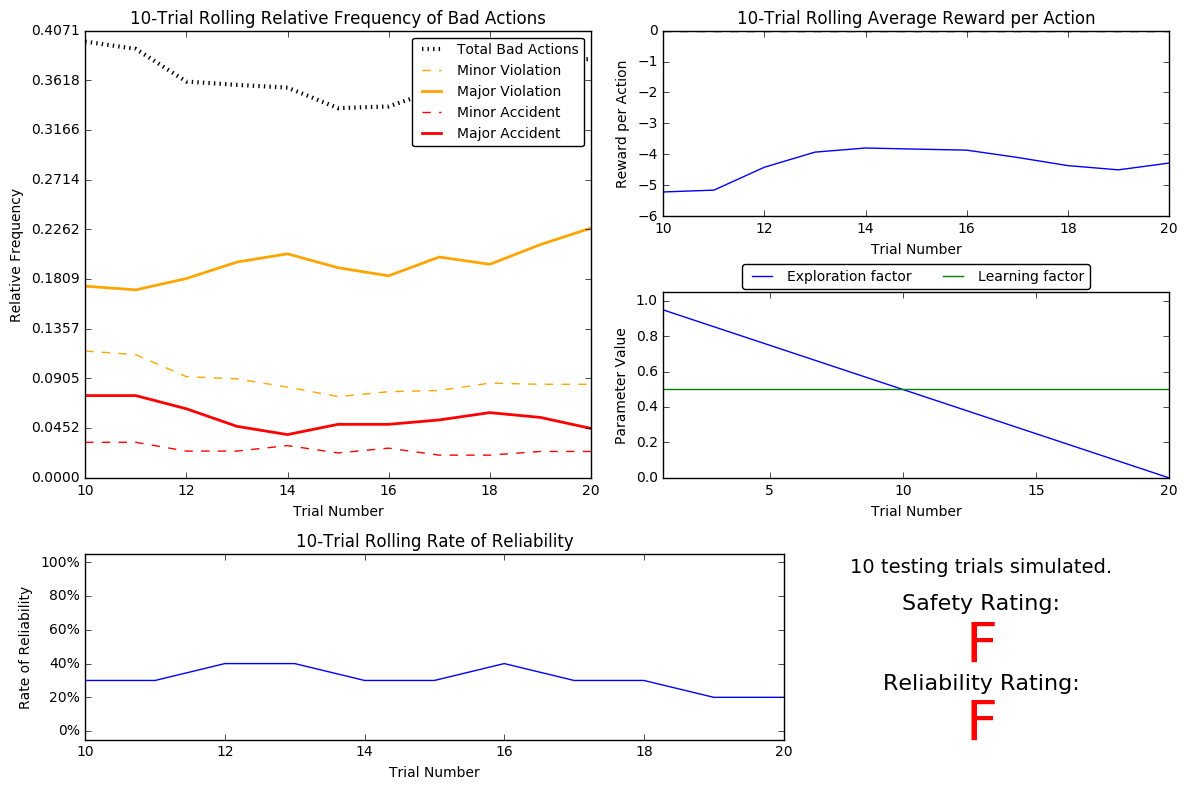

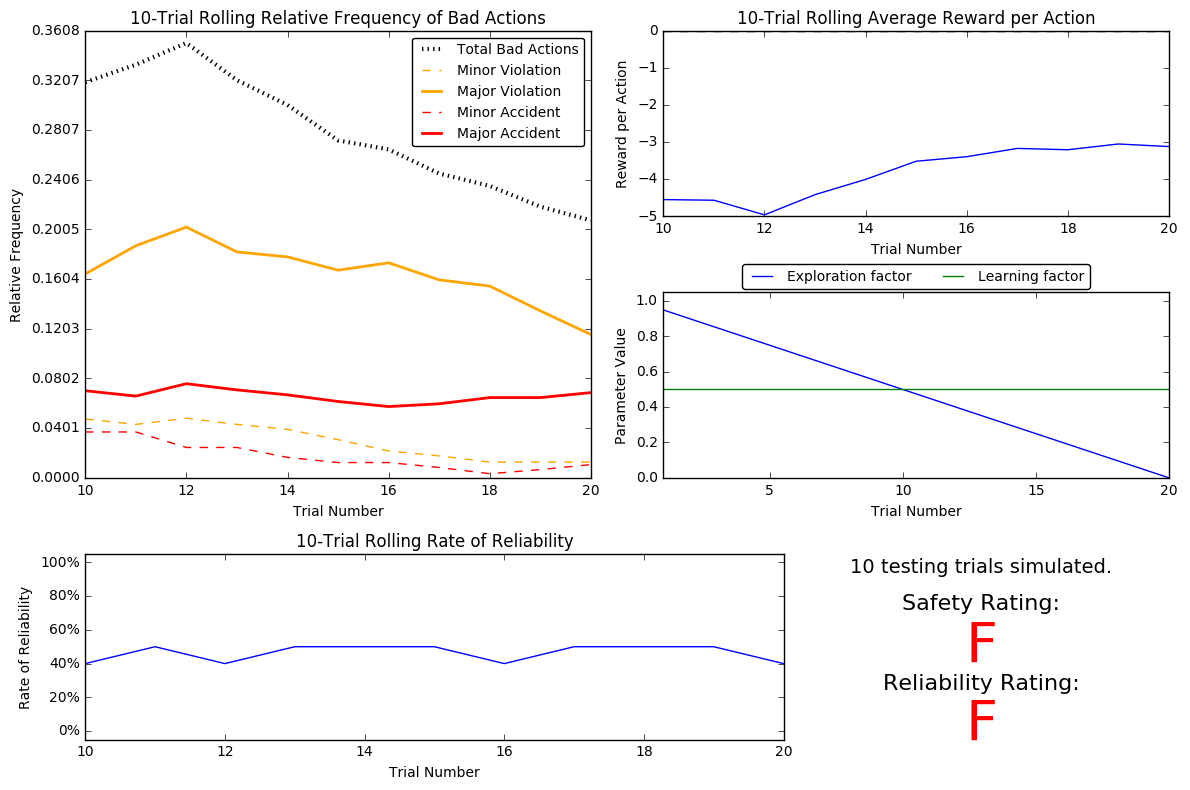

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning_first.csv')
vs.plot_trials('sim_default-learning_second.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
differences between basic and default Q learner:
* Q learner has greater rolling rate of reliability.
    * interestingly this fluctuates between 40 and 50%, in comparison to no learning where the rolling rate of reliability stays at 0%
* Q learner reward per action increases
    * When learning is disabled the agent does not improve (the rolling rate of reward starts at ~-5 and decreases to ~-7, though this can be attributed to random noise)
    * With learning enabled there is a clear increase of reward per action as the number of trials increases, demonstrating that the model is developing.
* Q learner results in decreasing bad actions.
    * Again this is indicative of the fact that the model is developing an improving strategy as the number of trials increase.
    * Between trial 10 and 12 the number of bad actions increases, however this is likely due to a couple of factors.
        * In particular during this time $\epsilon$ is between 0.5 and 0.4 meaning that the agent is taking a random action almost 50% of the time, making bad actions more likely.
        * In addition the Q states will have been less mapped at this stage and hence less developed.
* 20 trials before testing.
* safety and reliability the same (F for both) as random choice.
* The decay function is accurately represented, consisting of linear negative gradient.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

sim_alpha_power_trial.csv


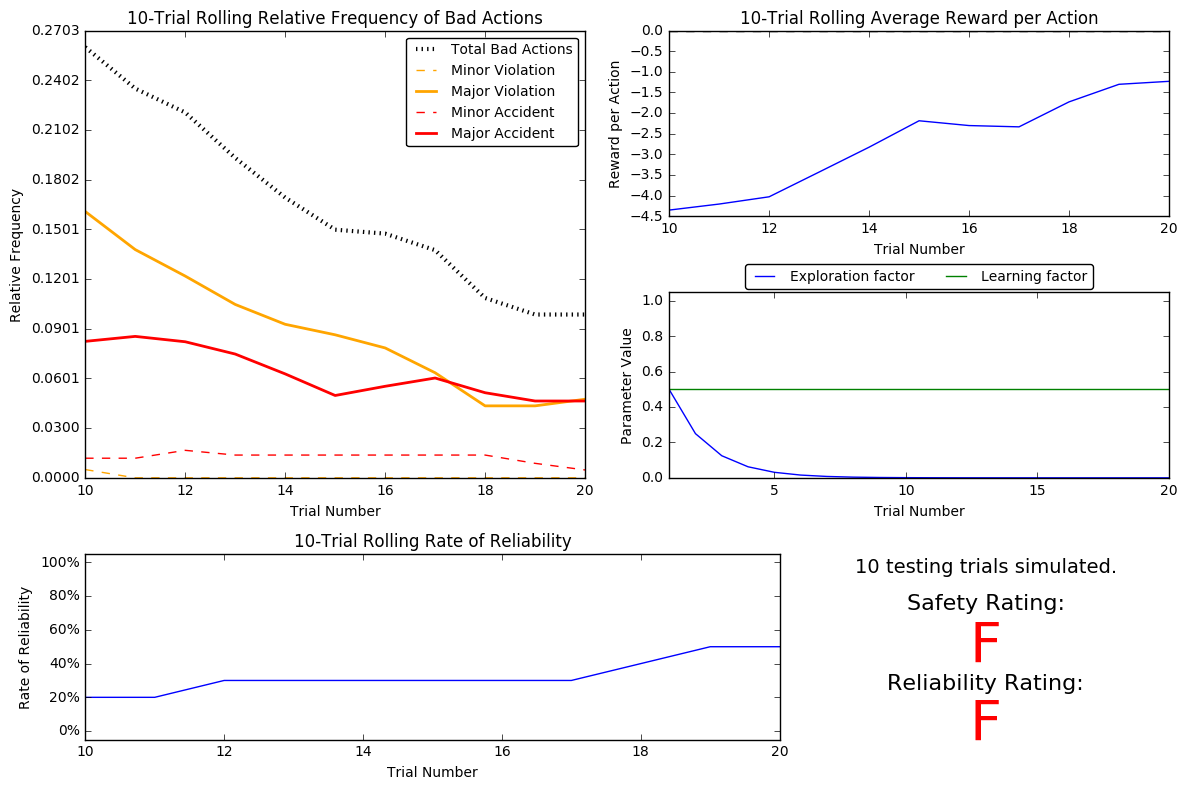

sim_alpha_power_trial_choice_fix.csv


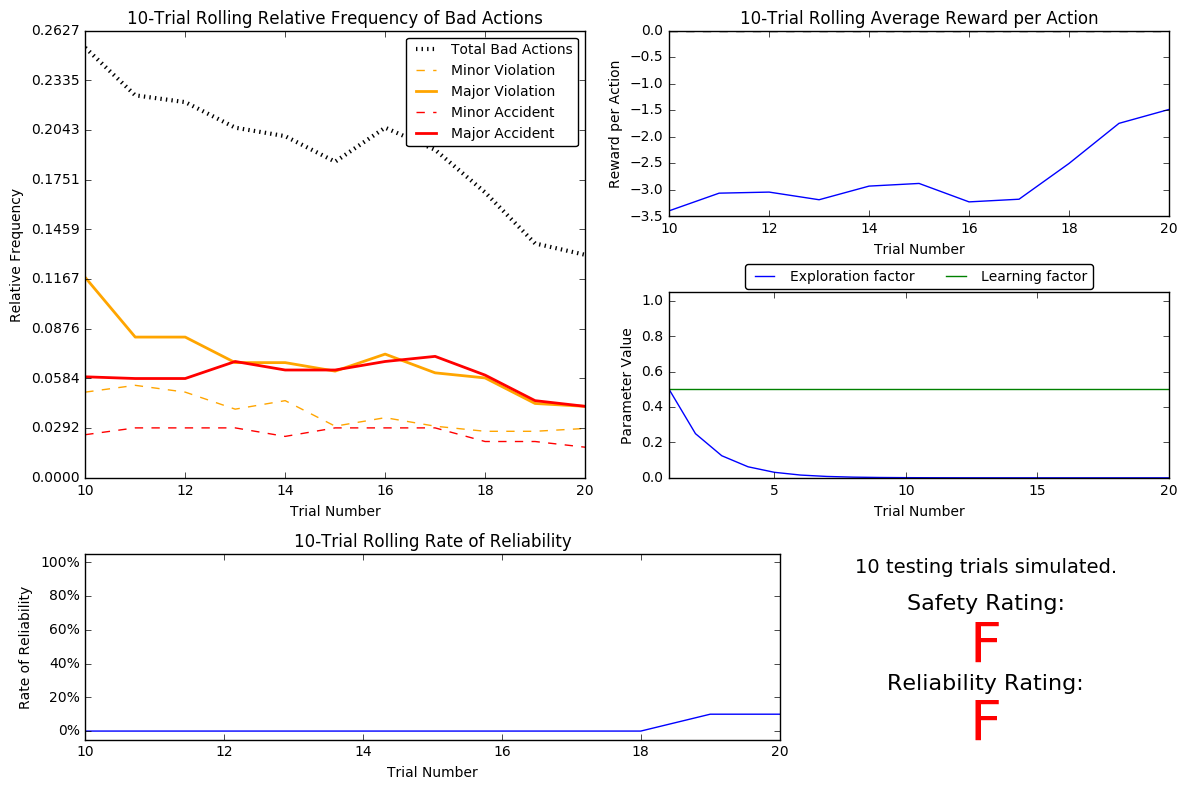

one_over_trial_squared.csv


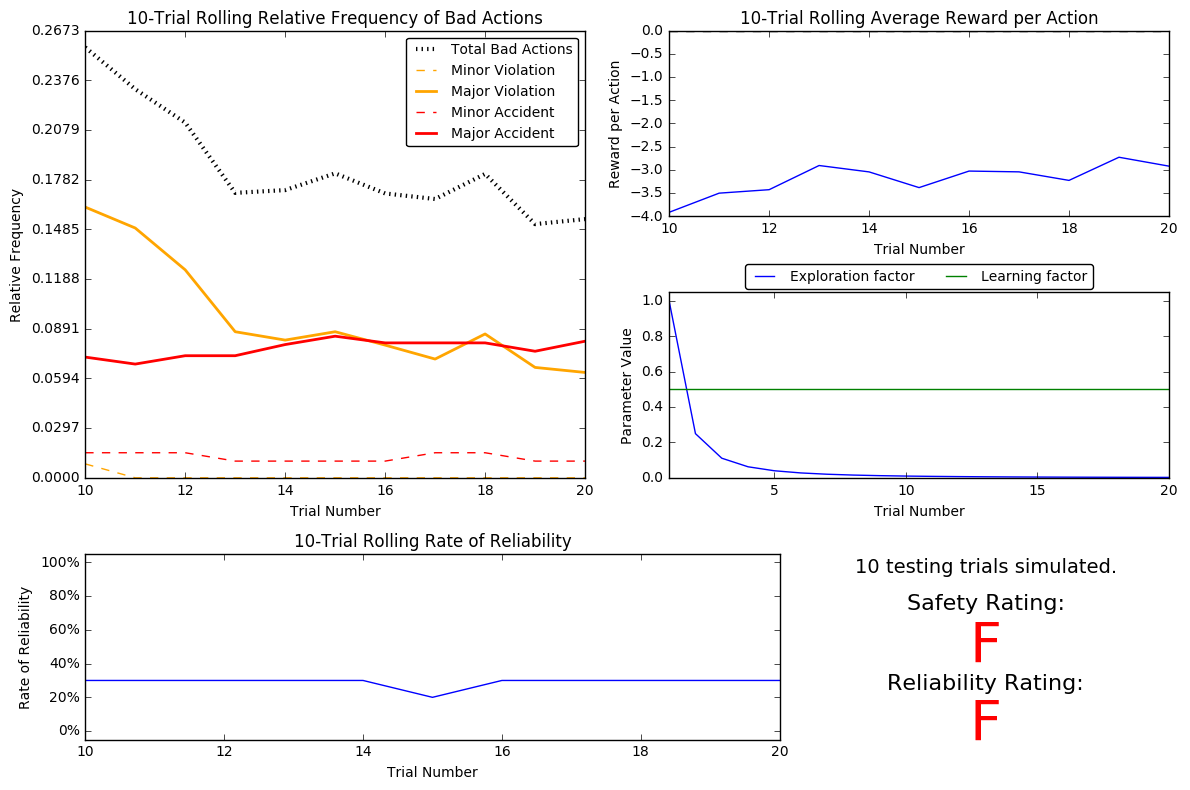

one_over_trial_squared_choice_fix.csv


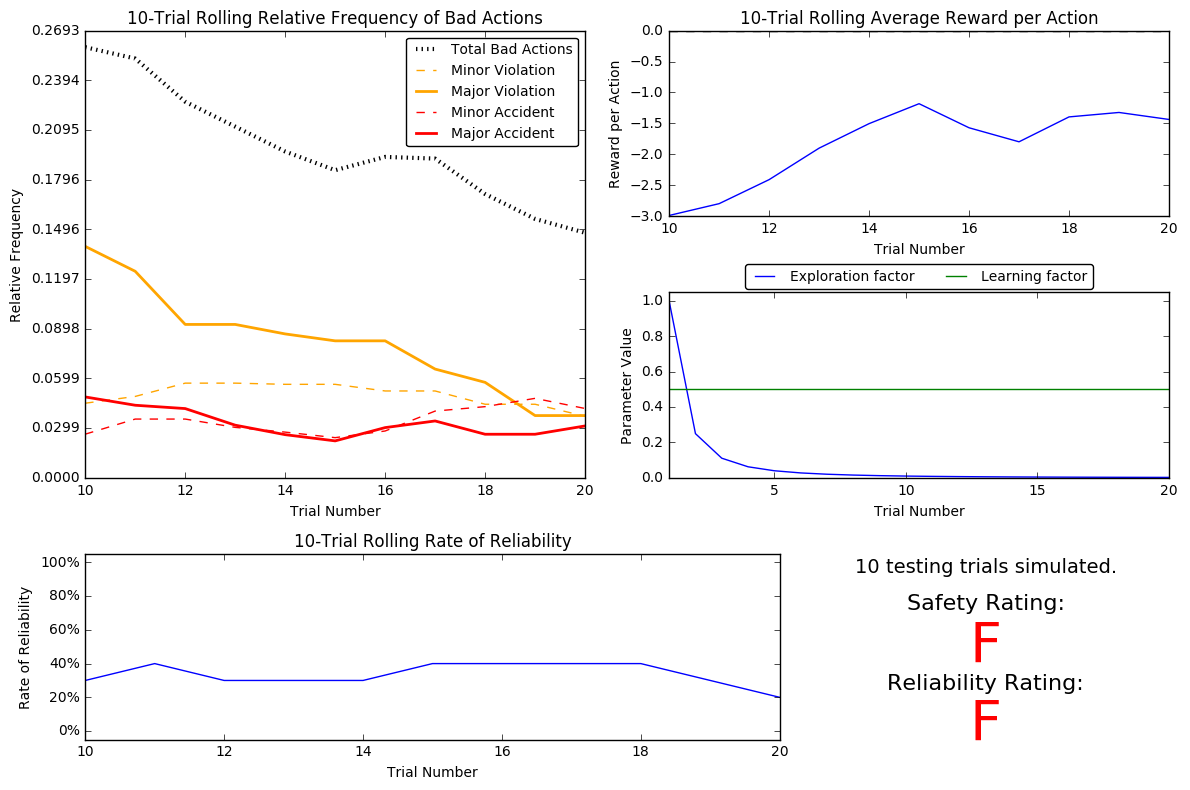

exponential_decay_alpha_trial.csv


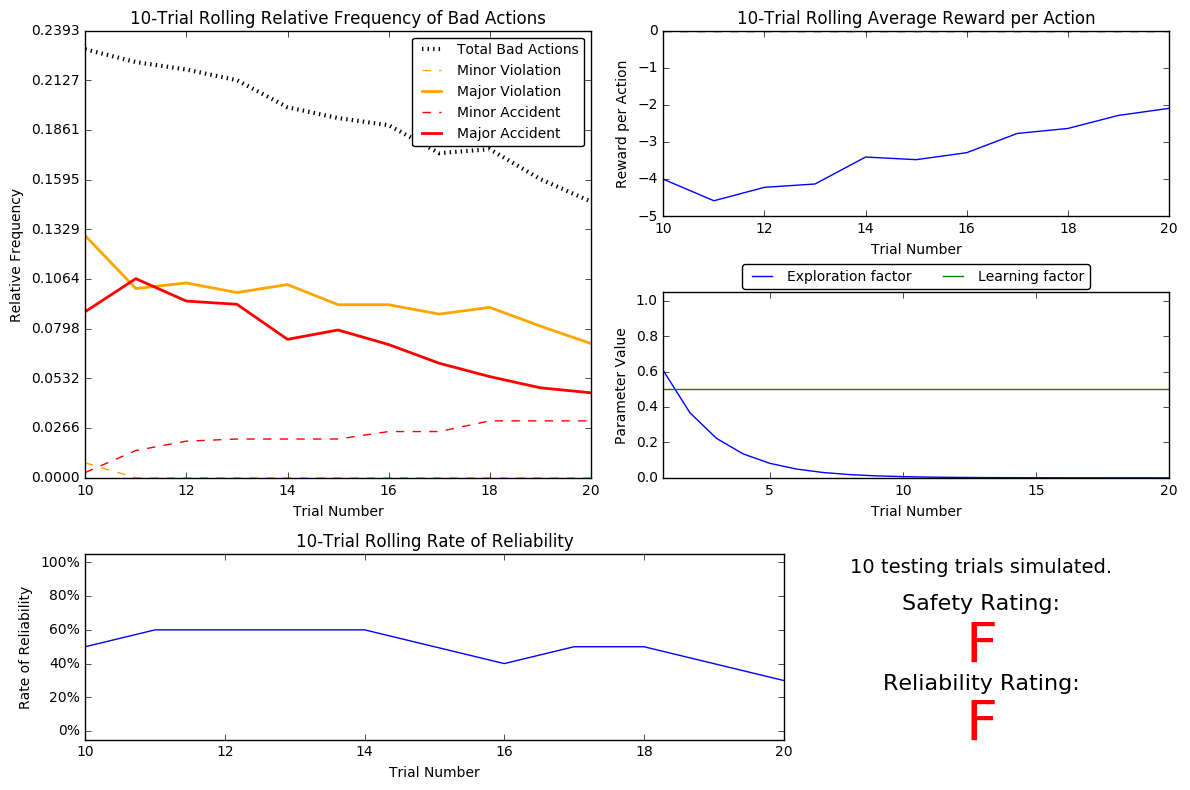

exponential_decay_alpha_trial_choice_fix.csv


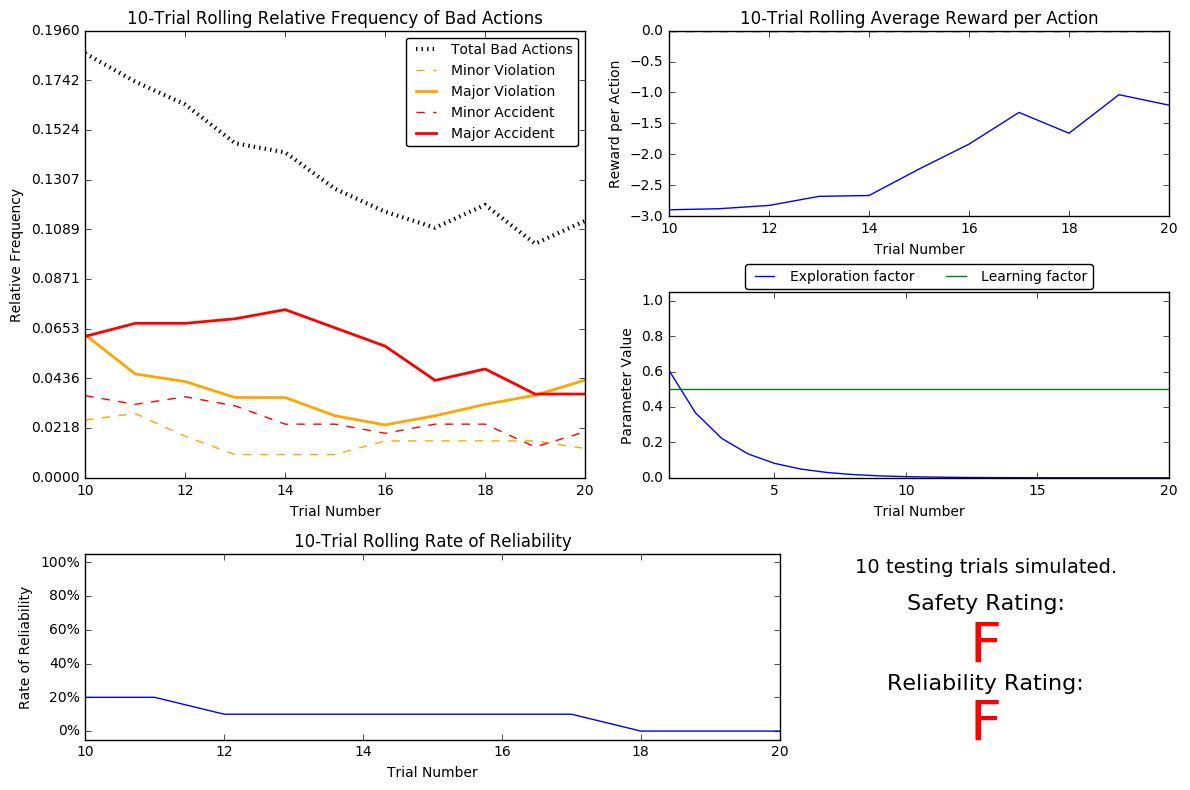

cosine_alpha_trial.csv


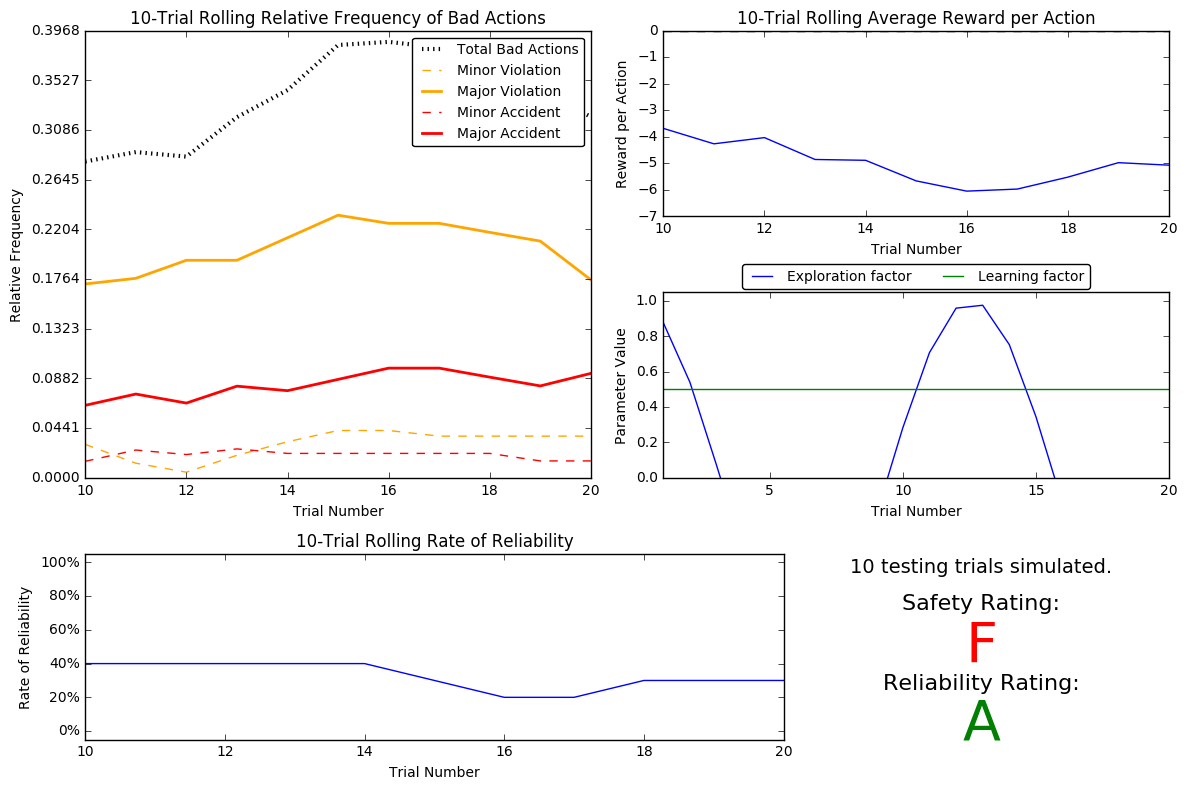

cosine_alpha_trial_choice_fix.csv


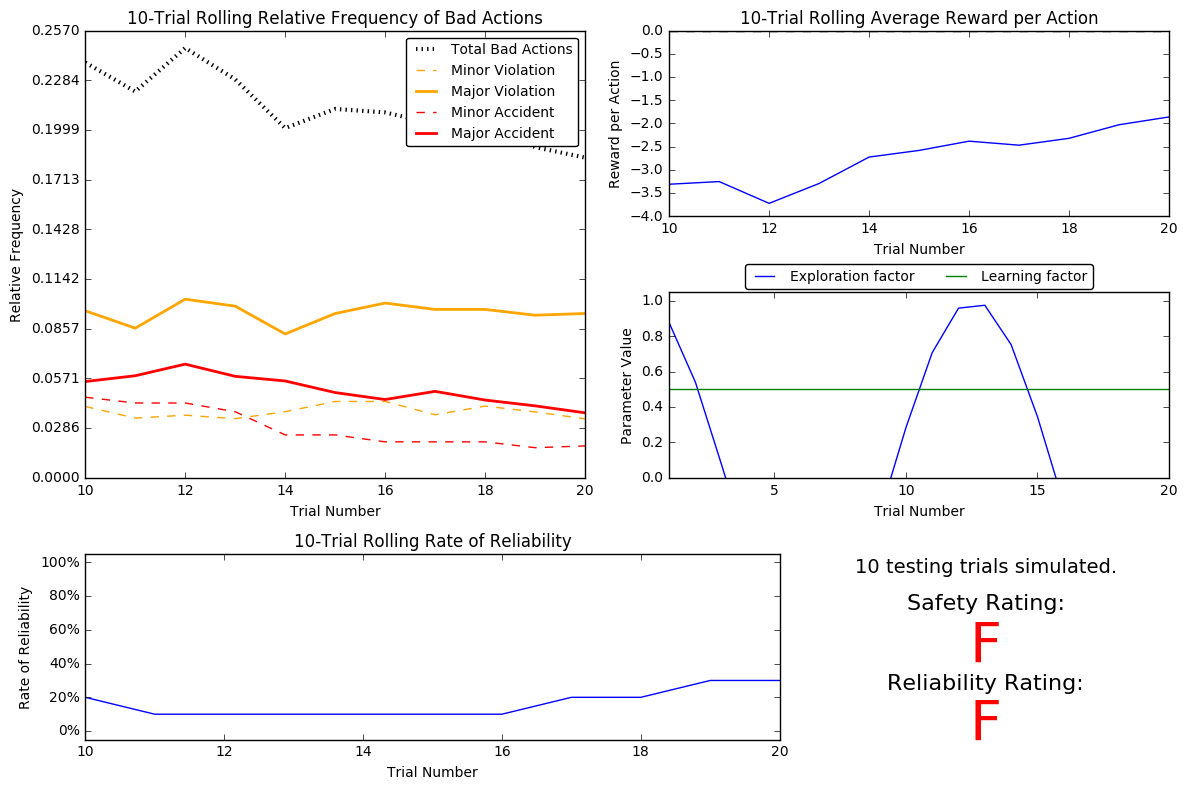

custom_decay.csv


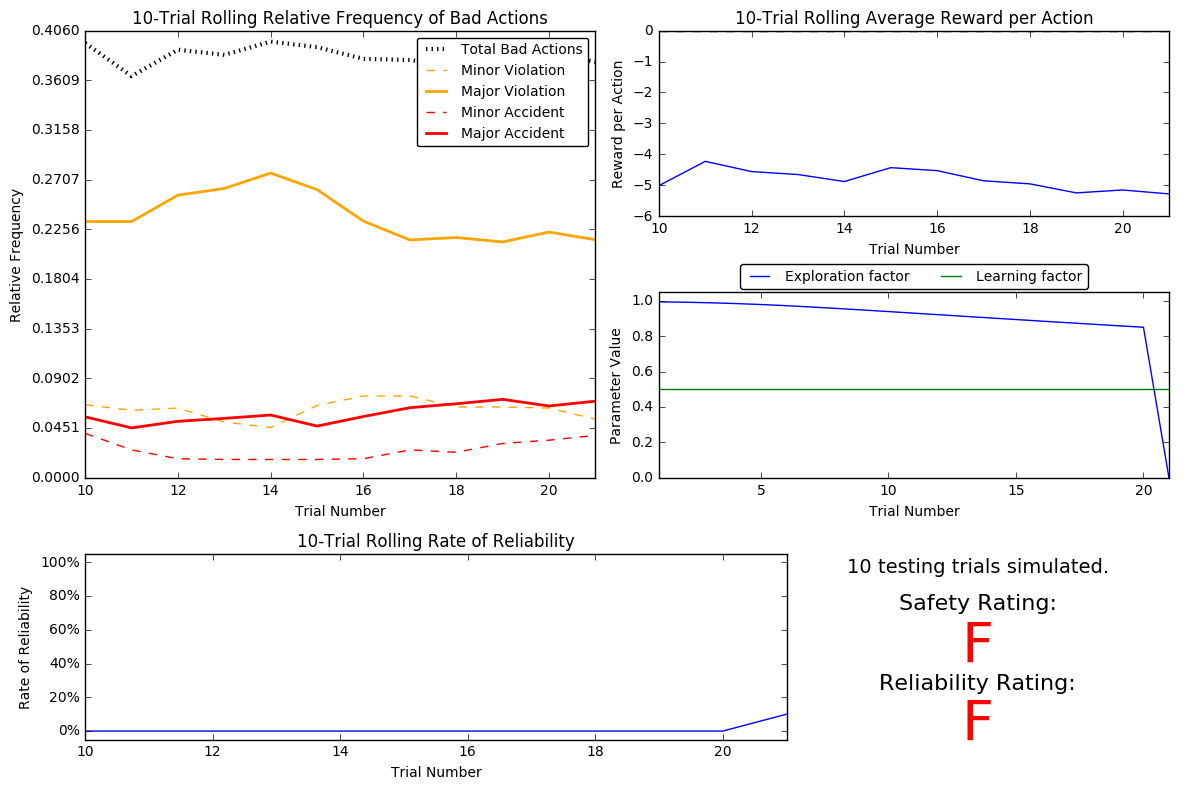

custom_decay_choice_fix.csv


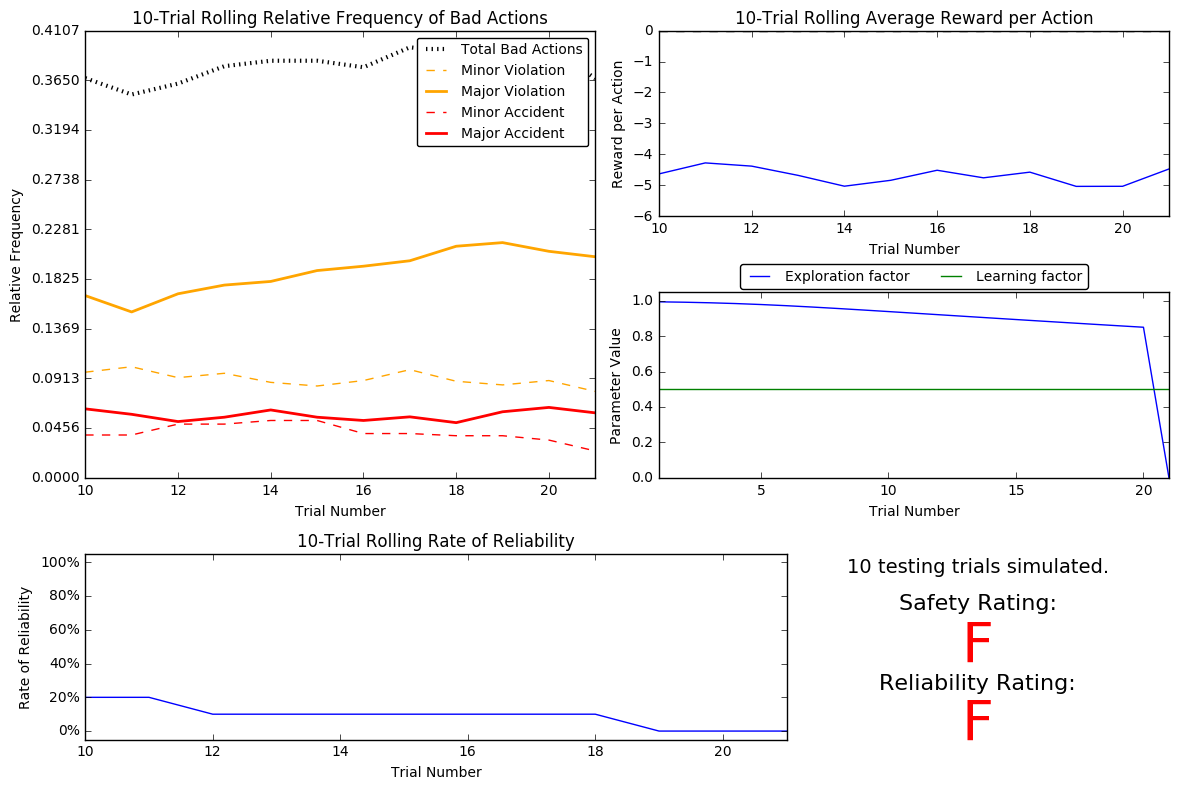

alpha_epsildon_decay.csv


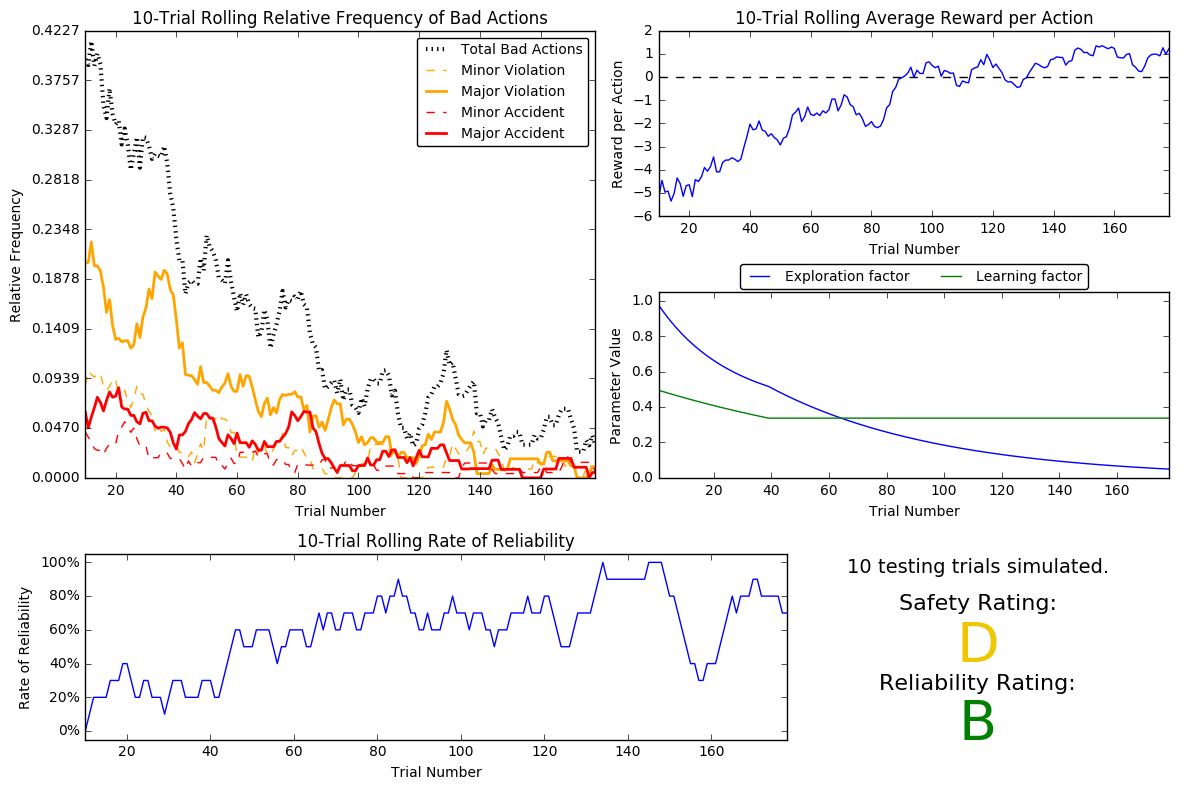

alpha_epsildon_decay_choice_fix.csv


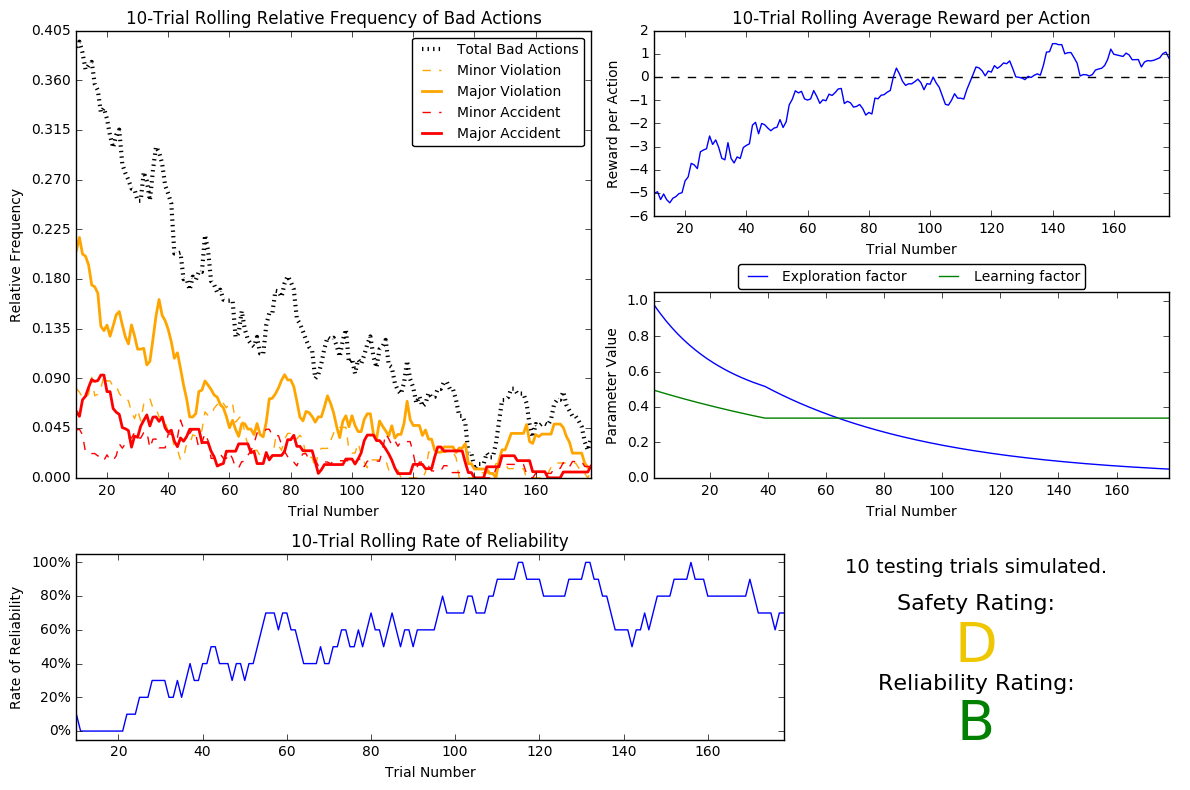

alpha_epsildon_decay_choice_fix_improved.csv


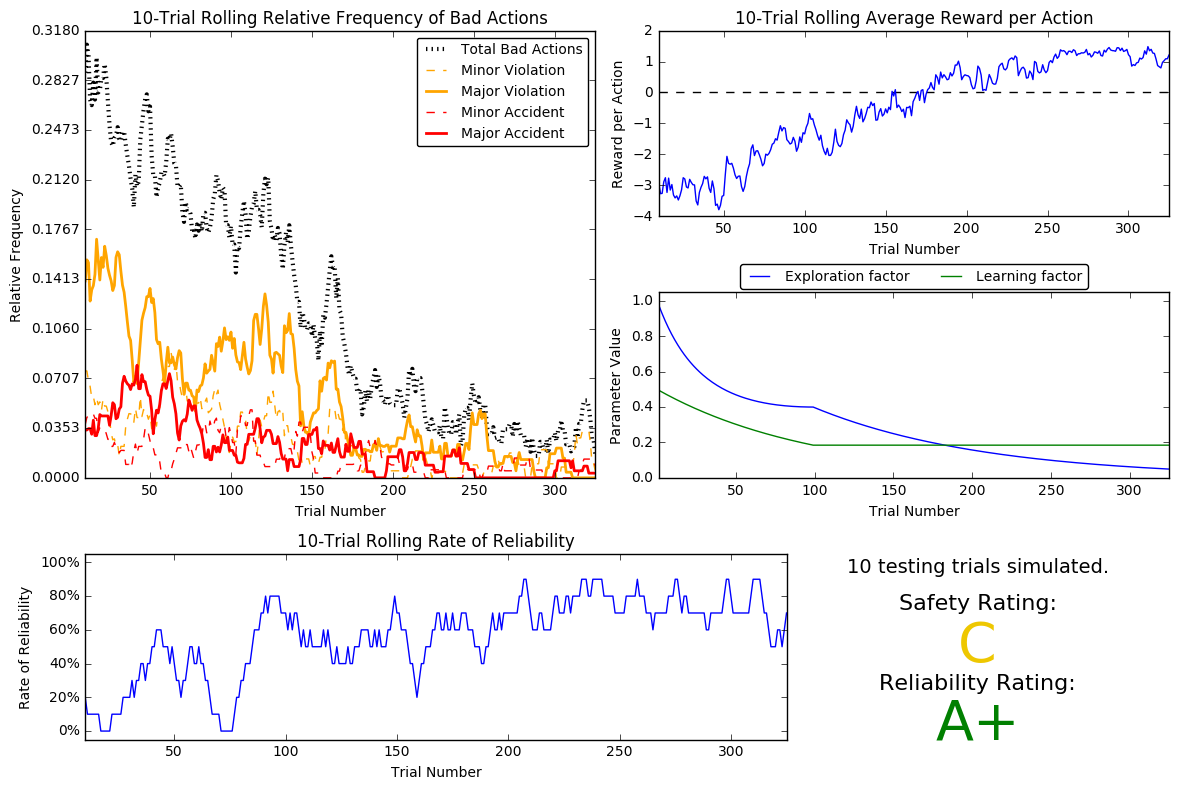

alpha_epsildon_decay_sinc.csv


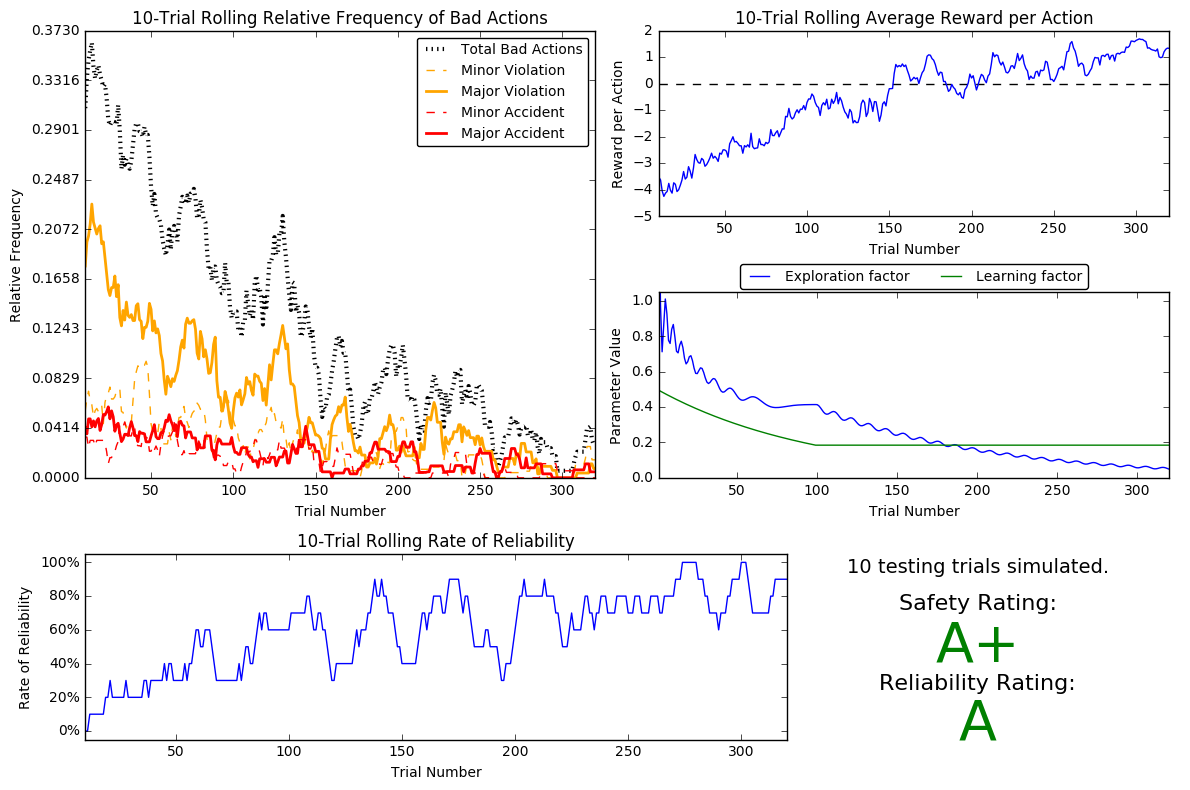

In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print 'sim_alpha_power_trial.csv'
vs.plot_trials('sim_alpha_power_trial.csv')

print 'sim_alpha_power_trial_choice_fix.csv'
vs.plot_trials('sim_alpha_power_trial_choice_fix.csv')

print 'one_over_trial_squared.csv'
vs.plot_trials('one_over_trial_squared.csv')

print 'one_over_trial_squared_choice_fix.csv'
vs.plot_trials('one_over_trial_squared_choice_fix.csv')

print 'exponential_decay_alpha_trial.csv'
vs.plot_trials('exponential_decay_alpha_trial.csv')

print 'exponential_decay_alpha_trial_choice_fix.csv'
vs.plot_trials('exponential_decay_alpha_trial_choice_fix.csv')

print 'cosine_alpha_trial.csv'
vs.plot_trials('cosine_alpha_trial.csv')

print 'cosine_alpha_trial_choice_fix.csv'
vs.plot_trials('cosine_alpha_trial_choice_fix.csv')

print 'custom_decay.csv'
vs.plot_trials('custom_decay.csv')

print 'custom_decay_choice_fix.csv'
vs.plot_trials('custom_decay_choice_fix.csv')

print 'alpha_epsildon_decay.csv'
vs.plot_trials('alpha_epsildon_decay.csv')

print 'alpha_epsildon_decay_choice_fix.csv'
vs.plot_trials('alpha_epsildon_decay_choice_fix.csv')

print 'alpha_epsildon_decay_choice_fix_improved.csv'
vs.plot_trials('alpha_epsildon_decay_choice_fix_improved.csv')

print 'alpha_epsildon_decay_sinc.csv'
vs.plot_trials('alpha_epsildon_decay_sinc.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
all of the example functions were used as well as a custom function:

    epsilon = (-1.0/(1.0 + np.exp(- self.alpha * trial + 2)) + 1) ^ 0.02

This was chosen as it was a function that decayed exponentially and to aid in intuitive understanding, this was also limited to 20 trial learning steps.

In addition to the graph displaying custom decay there is an additional graph demonstrating simultaneous alpha and epsilon decay. In this grap alpha decays as so:

    if trial < 40:
        self.alpha *= 0.99
        
    self.epsilon = np.exp(-self.alpha * trial) ** 0.05

As with above this was done with the intent of exploring the domain gaining a more intuitive understanding of the domain.

Analysis:
1. $\epsilon = \alpha^t$
    * $\epsilon$ starts at 0.5 decays exponentially (duh), with only the first couple of trials having an exploration factor less than that of $\frac{1}{t^2}$
    * continual increase of rolling reward
    * continual increase of rolling rate or reliability
    * violations and major accidents decreases as trials increase, however minor accidents do not decrease until after trial 18, though these were low to begin with.
    * rate of reliability not on par with default until after trial 17 when it is consistently greater.
    * rolling reward per action starts out less but increases with a linear gradient developing better than default.
    * in testing reliability rating F, safety rating F.

1. $\frac{1}{t^2}$
    * $\epsilon$ starts at 1, fastest decay
    * minor violations decrease but other violations and accidents do not.
    * minor violations decrese until around trial 13, after which rate of decrease is reduced and in some cases increases by a small amount
    * sharp decrease in exploration coincides with this
    * rolling reward has asyptote ~-3.0, limited increase as simulation progresses
    * small epsilon means harder to explore all states and therefore harder to learn, agrees with above observations.
    * more trials would not result in greater reliability or safety.
    * in testing reliability rating F, safety rating F.

1. $\epsilon=e^{-\alpha t}$
    * all violations and major accidents decrease as trials increase. however minor accidents increase.
    * rolling reward increases with trials
    * rate of reliability does not increase as trials increase
    * in testing reliability rating F, safety rating F.
    * worse than default learner for reliability

1. $\epsilon = \cos{ \left( \alpha t \right) }$
    * when epislon falls to 0 between trials 3 and 9, the rate of accidents adn violations increases with t, and rate of reliability remains unaffected.
    * after trial 9 the rate of reliability decreases, in particular around trials 16 and 17 when $\epsilon$ is at its maximum
    * reliability from testing rated at A, this is likely due to the high exploration factor, allowing for more accurate Q values for corresponding states. Safety rating F.
    * better than default learner for reliability
    
1. custom decay:
    * exploration factor is high throughout trials, drops to 0 after trial 20 -- this was done to limit the number of trials to that of other methods for an accurate comparisson
    * bad actions do not change throughout testing, effectively random movement due to high exploration factor.
    * exploring lots of states does not increase safety or reliability, rated at F for both.
    * worse in all respects than default learner.

1. Alpha epsilon decay:
    * takes ~180 trials to converge
    * all bad actions as number of trials increase, until ~ trial 170, after which there is minor increase. likely this is random.
    * rolling average reward increase with number of trials, only model to get positive rolling reward.
    * only model to have non F safety rating, with safety rating of D.
    * reliability rating is less than optimal, B, this could be due to driving safely results in impossible to get to destination in time. 
    * takes longer to train but actually benefits from long training time. better than default learner. 
    * learning rate ceased decay after trial 40 to allow epsilon to decay within a reasonable amount of time.

Two methods stand out, 4 and 6 having greater than F reliability.
potentially 4 could be allowed to train for longer as cosine is endlessly cyclic.
6 can be considered the better of the two, benefiting the most from longer train time and the only method to result in a safety rating greater than F.

** Post Choice rerun Fix **
Analysis:
1. $\epsilon = \alpha^t$
    * $\epsilon$ starts at 0.5 decays exponentially (duh), with only the first couple of trials having an exploration factor less than that of $\frac{1}{t^2}$
    * Rolling reward fluctuates between -3.5 and -3.0 until trial 19 when it increases drastically. by this point $\epsilon << 0.1$
    * Reliability starts and stay at 0% until trial 19 when it increases to 10%
    * Total bad actions decrease steadily, with sharp decrease after trial 19. 
        * Primary decrease is from major and minor violations
        * Major accidents increase before decreasing, wheras minor accidents barely decrease.
    * Reliability and saftey are both F
    * Better than default learner -- reward per action is higher as model develops

1. $\frac{1}{t^2}$
    * $\epsilon$ starts at 1, fastest decay
    * Rolling reward peaks at trial 15, with a value of ~ -1.25
    * Rolling rate of reliability fluctuates between 20-40%
    * Total bad actions decreases steadily with minor increase between trial 15 and 17
        * This decrease primarily comes from major violations
        * Minor violations stay about the same
        * Major and minor accidents decrease until trial 15 after which they increase
    * Safety and reliability rating of F
    * Better than default learner -- reward per action is higher as model develops

1. $\epsilon=e^{-\alpha t}$
    * Total bad actions reduce with number of trials, except for small increase at trial 18, likely random noise
        * Major accidents increase until trial 14 and then begin decreasing
        * Major violations decrease until trial 16 when they start increasing
            * there is a sharp decrease in major accidents around this time suggesting that the agent has 'learnt' to cause a traffic violation to prevent an accident.
        * Minor violations fluctuate over time
        * Minor accidents tend do decrease
    * At trial 18 not only does the total bad actions increase comparted to trial 17, the rolling reward decreases for that single trial. trial 19 has a higher rolling reward and lower total bad actions suggesting the learning algorithm has overcome a local minima.
    * The rolling rate of reliability only decreases, never increases.
    * Safety and reliability rating of F
    * Better than default learner -- reward per action is higher as model develops

1. $\epsilon = \cos{ \left( \alpha t \right) }$
    * Total bad actions is erratic between trials 10 and 15, this makes sense given that $\epsilon$ would be close to $1$ during this period.
       * After trial 15 total bad actions decrease
       * Frequency of major violations stay relatively constant
       * Opposide to 3 the frequency of major acidents increases while frequency of minor violations decreases.
           * this is at trial 17 corresponding to a reduction in rolling reward for this trial. subsequent trials see this trend reverse with rolling reward increasing, and major/minor accidents decreasing, hereafter.
   * Rolling rate of reliability is at 10% until trial 16 where it begins to increase. this is in agreement with the above observations.
   * Safety and reliability ratings of F
   * Better than default learner -- reward per action is higher as model develops

1. custom decay:
    * Given that the number of trials here was truncated at 20 this cannot be considered a serious test, but there are useful observations to be made, albeit few.
    * This is worse than the default learner by far.
    * While the agent was able to explore many states it was not able to do so constructively due to high $\epsilon$, effectively performing a random walk through the state space resulting in the Q value not being reinforced sufficiently.
    * Worse than default learner -- reward per action is lower as model develops

1. Alpha epsilon decay:
    * Greatest number of trials.
    * Shows the most reduction in bad actions.
        * overcomes many local minima
    * Is the only model (so far) to develop a positive rolling reward.
    * Rolling rate of reliability reaches almost 100% at ~ trial 130.
        * rolling rate of reliability decreases meaning the agent does not always reach the destination in time, however from the safety rating and continued reduction in frequency of bad actions it can be inferred that the model sacrifices reliability for safety.
    * Better than default learner -- reward per action is higher as model develops, and reliability and safety much better (reliability/safety B/C)
   
1. alpha_epsildon_decay_choice_fix_improved:
    * Same decay function as above, however alpha decay stops after trial 100.
    * Following the trend of 6 above the model becomes more reliable and safer as the number of trials increases
    * Why is a decaying alpha factor a good idea?
        * Initially when $\alpha$ and $\epsilon$ are large the agent is starting from a completely undeveloped model, in these early stages we want the model to develop a rough approximation as quickly as possible. Once we have this rough approximiation what we are doing is applying corrections to increase the accuracy of the model as fast as possible.

1. alpha_epsildon_decay_sinc:
    * the function applied here is identical to 7 except epsilon is calculated as such: ```epsilon = np.exp(-alpha * trial) ** 0.05 + np.sinc(alpha * trial)```
        * One of the benefits from having this fluctuating exploration factor is that in effect the agent is double checking its results in an indirect manor, being more likely to develop the Q value for the action that corresponds to the greatest Q value in one pass, and being more likely to explore alternate actions in a subsequent run.
    * When comparing this model to the 7 the number of bad actions increases during local maxima of $\epsilon$, which is expected as the model is more likely to take a random action. However as $\epsilon$ decays the total number of bad actions reduces in comparison to 7.
        * around trial 300 bad actions falls almost 0
    * The safety rating of this model is A+ with a reliability of A suggesting that having epsilon fluctuate around a value does lead to some improvement. Though not as reliable as 7, it is safer, which is more desirable over all.
    * Initially $\epsilon$ is greater than 1 due to the sinc function being directly added to the other part of the $\epsilon$ function ($sinc(0)=1$) but this allows for the model to explore more states and better develop early on.
        * This early exploration is likely a contributing factor in the development seen later and the better results
    * Same number of trials as 7.


On the subject of the random choice fix. It is curious comparing the fixed models to their unfixed equivalents in that they have a worse reliability rating for all except the final model. The likely reason for this is that the prefernce for going right reduced the state space the model explored and hence the resulting learning was more focussed.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
note to examiner, I do not drive and live in the UK. Some assumed knowledge may not be present in my case (i.e who has right of way in different circumstances)

In all cases when the light is red the agent should do nothing, otherwise this would be a traffic violation and potential accident. typically when the light is green the agent should move towards the goal, unless doing so would cause an accident -- such as turning left on a green light with oncoming traffic

1. waypoint: forward, lights: Red, left: left, right:None , oncoming:None
    * desired behaviour is not to move when lights are red, otherwise can collide with vehicle on the left.
    * should wait until lights are green and will not collide with lefthand vehicle. optimum action is not to move
    * policy from 6, above, produces optimum action of wait in this case.
    
        >('forward', 'red', 'left', None, None)
        > >-- forward : -5.73
        >
        > >-- right : 0.11
        >
        > >-- None : 2.03
        >
        > > -- left : -8.68

1. waypoint: forward, lights: green, left: left/right, right:None , oncoming:None
    * optimum move is to go forward, towards goal.
    * policy from 6, above, produces optimum action of forward in this case, in aggreement.
   
        >('forward', 'green', 'left', None, None)
        > > -- forward : 1.83
        >
        > > -- right : 0.43
        >
        > > -- None : 0.00
        >
        > > -- left : -0.07
        
        >('forward', 'green', 'right', None, None)
        > > -- forward : 1.18
        >
        > > -- right : 0.68
        >
        > > -- None : -1.60
        >
        > > -- left : -0.02
    
1. waypoint: left, lights: green, left: None, right: forward , oncoming:None
    * disregarding safety, optimum move is to go left
    * if the smartcab goes left it will colide with the oncoming vehicle, should wait until its passed.
    * policy from 6, above, produces optimum action of forward in this case, with doing nothing being the worst action to take. Or else is this because the primary agent could be rear ended by other agents?
        >('left', 'green', None, 'forward', None)
        > > -- forward : 0.50
        >
        > > -- right : 0.01
        >
        > > -- None : -3.05
        >
        > > -- left : 0.17
    
1. waypoint: left, lights: green, left: None, right: None , oncoming: forward
    * if the agent were to go left in this case an accident would occur due to potential collision with oncoming traffic.
    * not moving would be a minor traffic violation.
    * that would leave going forward as the closest to going towards the goal.
    * from the below states all having non 0 Q values the agent has clearly explored all of the resulting actions
    * 6 has an actual max q value when going right, counter intuitively. why? -- lets look at the two similar cases below
        > ('left', 'green', None, None, 'forward')
        > > -- forward : 0.27
        >
        > > -- right : 1.26
        >
        > > -- None : -4.59
        >
        > > -- left : -17.48
        
1. waypoint: left, lights: green, left: forward, right: None , oncoming: forward
    * as above the agent should go forward and in this case that is the optimum policy
    * however given number of Q values of 0 that this is a set of state/actions that have not been explored.
        >('left', 'green', 'forward', None, 'forward')
        >> -- forward : 0.87
        >
        >> -- right : 0.00
        >
        >> -- None : 0.00
        >
        >> -- left : 0.00
        
1. waypoint: left, lights: green, left: None, right: forward , oncoming: forward
    * similar to 4, but not as well explored. while there is a heavy negative reward for going left, and a slightly positive reward for going right going forward and taking No action are unexplored. 
        >('left', 'green', None, 'forward', 'forward')
        >> -- forward : 0.00
        >
        >> -- right : 0.81
        >
        >> -- None : 0.00
        >
        >> -- left : -16.79
        
Note to examiner:
It was found upon investigation that the method of choosing an action via selecting the highest q value had a bug in it.
```
action = sorted(self.Q[state].items(), key=lambda t: t[1], reverse=True)[0][0]
```
in the above code example, when all of the Q values are equal the sort happens via keys of the dictionary which means that states of identical Q values will always choose in reverse alphabetical order. In practice this means that 'right' is always selected when the Q values are initialized to 0. This will be fixed, affected results are to be marked as affected by this bug. They will also be rerun and compared to the old results.

** Post choice fix **
1. waypoint: forward, lights: Red, left: left, right:None , oncoming:None
    * desired behaviour is not to move when lights are red, otherwise can collide with vehicle on the left.
    * should wait until lights are green and will not collide with lefthand vehicle. optimum action is not to move
    * policy from 6, above, produces optimum action of wait in this case.
    
        >('forward', 'red', 'left', None, None)
        >> -- forward : -3.63
        >
        >> -- right : 0.46
        >
        >> -- None : 1.53
        >
        >> -- left : -6.35

1. waypoint: forward, lights: green, left: left/right, right:None , oncoming:None
    * optimum move is to go forward, towards goal.
    * policy from 6, above, produces optimum action of forward in this case, in aggreement.
   
        >('forward', 'green', 'left', None, None)
        >> -- forward : 2.08
        >
        >> -- right : 0.52
        >
        >> -- None : -3.21
        >
        >> -- left : 0.95
        
        >('forward', 'green', 'right', None, None)
        >> -- forward : 2.10
        >
        >> -- right : -0.04
        >
        >> -- None : 0.00
        >
        >> -- left : 0.00
    
1. waypoint: left, lights: green, left: None, right: forward , oncoming:None
    * disregarding safety, optimum move is to go left
    * if the smartcab goes left it will colide with the oncoming vehicle, should wait until its passed.
    * policy from 6, above, produces optimum action of forward in this case, with doing nothing being the worst action to take. Or else is this because the primary agent could be rear ended by other agents?
    
        >('left', 'green', None, 'forward', None)
        >> -- forward : 1.30
        >
        >> -- right : -0.11
        >
        >> -- None : -3.92
        >
        >> -- left : 0.00
    
1. waypoint: left, lights: green, left: None, right: None , oncoming: forward
    * if the agent were to go left in this case an accident would occur due to potential collision with oncoming traffic.
    * not moving would be a minor traffic violation.
    * that would leave going forward as the closest to going towards the goal.
    * from the below states all having non 0 Q values the agent has clearly explored all of the resulting actions
    * in contrast to the bugged model going forward is the optimum action found in this case as seen below
        >('left', 'green', None, None, 'forward')
        >> -- forward : 0.71
        >
        >> -- right : 0.45
        >
        >> -- None : -3.06
        >
        >> -- left : -16.84
        
1. waypoint: left, lights: green, left: forward, right: None , oncoming: forward
    * as above the agent should go forward and in this case that is the optimum policy
    * however given number of Q values of 0 that this is a set of state/actions that have not been heavily explored.
        >('left', 'green', 'forward', None, 'forward')
        >> -- forward : 1.32
        >
        >> -- right : 0.00
        >
        >> -- None : -1.44
        >
        >> -- left : 0.00
        
1. waypoint: left, lights: green, left: None, right: forward , oncoming: forward
    * similar to 4, but not as well explored. while there is a heavy negative reward for going left, doing nothing results in a negative reward while going right produces no reward (we can see from the bugged resulty above that this would produce a slightly positive reward if the state had been explored more). 
        >('left', 'green', None, 'forward', 'forward')
        >> -- forward : 0.49
        >
        >> -- right : 0.00
        >
        >> -- None : -1.79
        >
        >> -- left : -11.39

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

When considering future rewards the greatest obstacle the environment presents is its unpredictability. For any given state the next state is not perfectly predictable to the agent as it cannot predict the future actions of other agents. Similarly the agent cannot percieve agents outside of its immediate surroundings -- it can only percieve potential agents to the left, right or oncoming.

In addition given that the destination changes trial to trial, and test to test, and the locations and actions of the dummy agents are random on initialization, it would be detrimental to train the agent with these things in mind -- the number of states would grow by several orders of magnitude and it would not be practical to reach and train the Q values for all of these.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.